In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%run voter_model_with_mutation.ipynb

In [7]:
# Define parameters as in paper
alpha = 10e-7
L = 200

grid_0 = init_grid(L)
n_iters = int(2e8)

grid, num_species = voter_model(grid_0, alpha, n_iters)

Text(0.5, 1.0, 'Grid after 200000000 iterations')

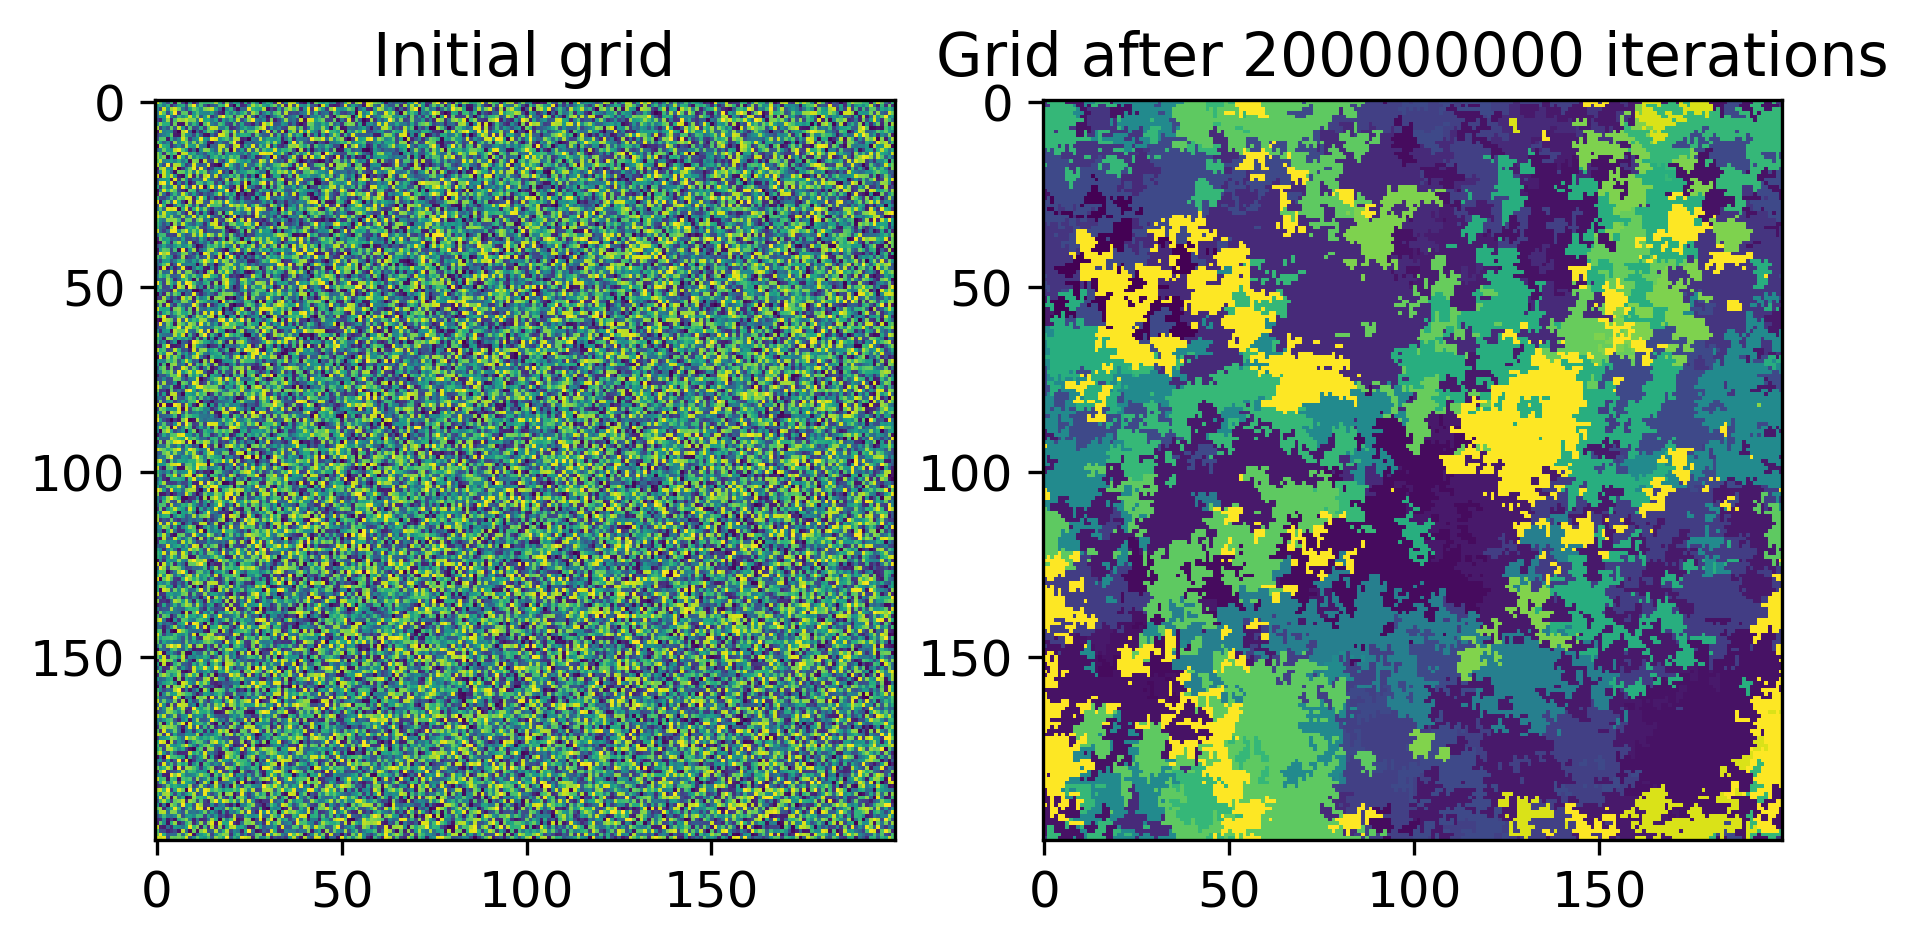

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 7))

ax1.imshow(grid_0)
ax1.set_title('Initial grid')

ax2.imshow(grid)
ax2.set_title(f'Grid after {n_iters} iterations')



Text(0.5, 0, 'Number of iterations (x10)')

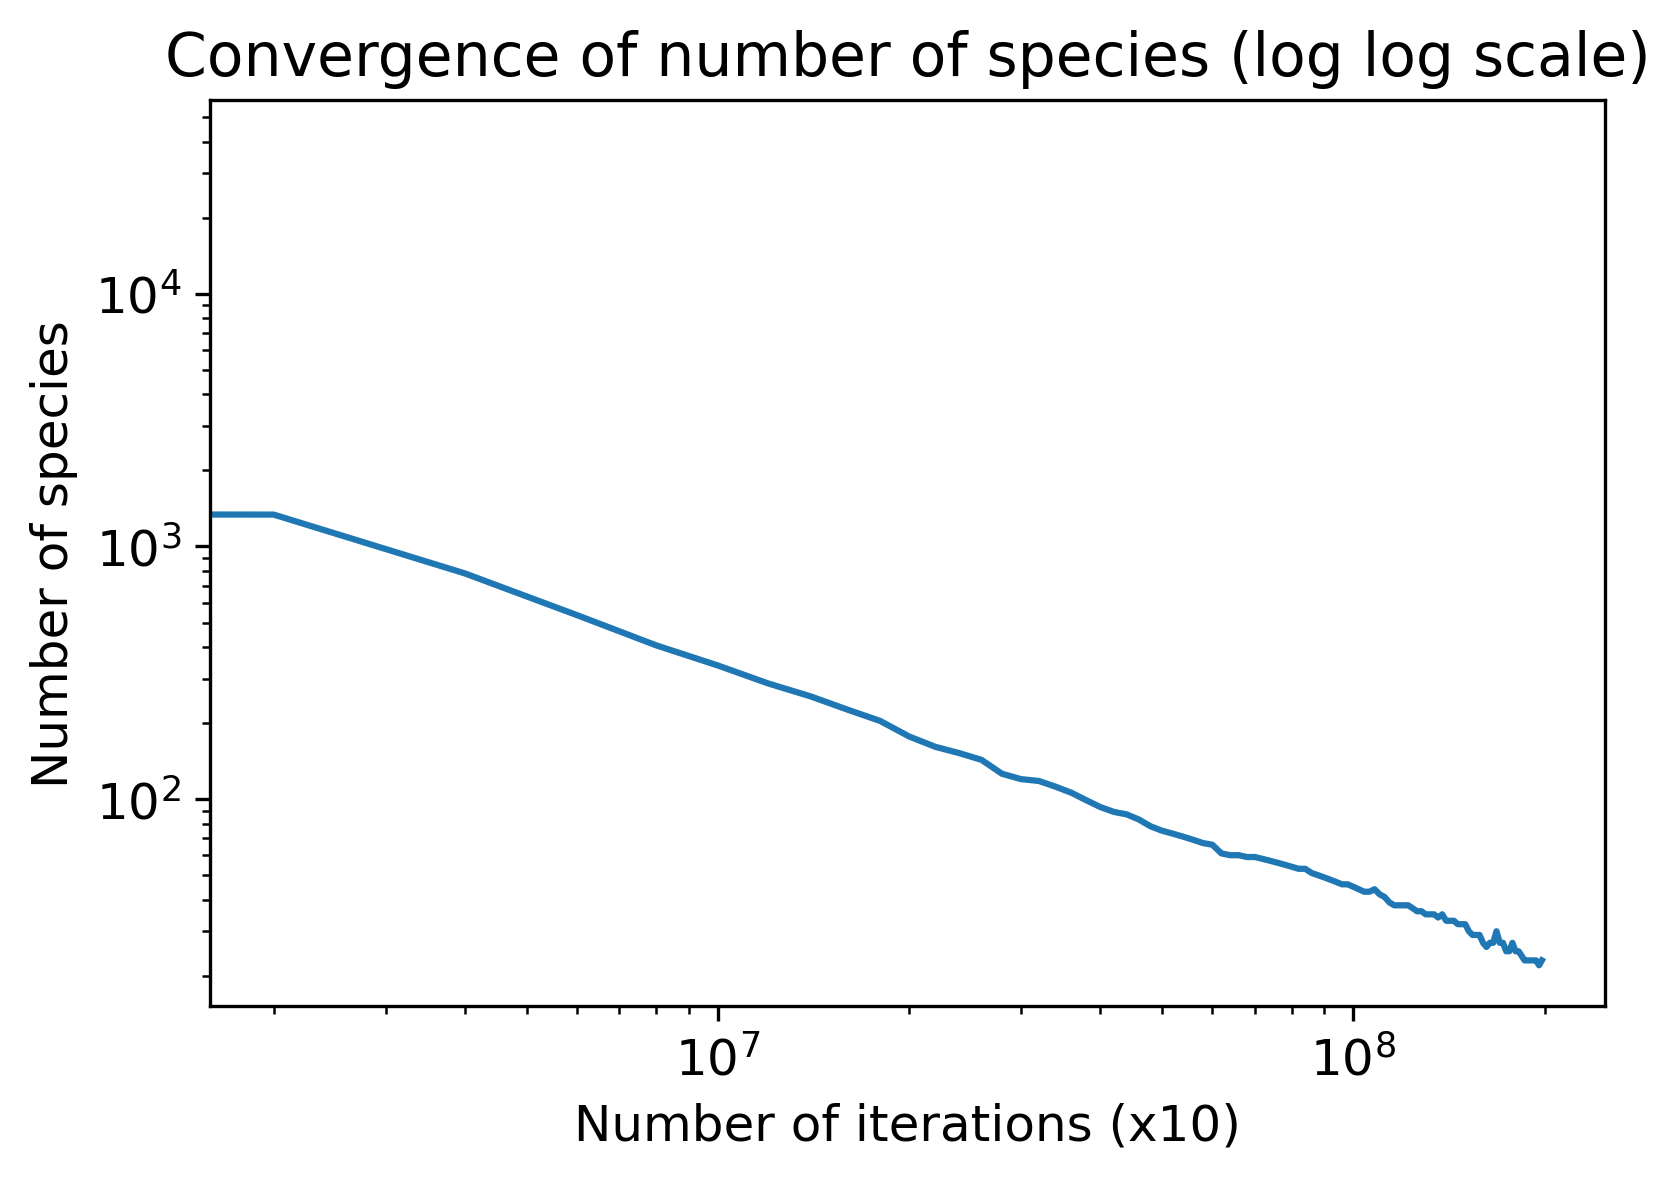

In [9]:
plt.loglog(np.arange(0, n_iters, n_iters/100), num_species)
plt.title('Convergence of number of species (log log scale)')
plt.ylabel('Number of species')
plt.xlabel('Number of iterations (x10)')

[0.32072703 0.31099651]


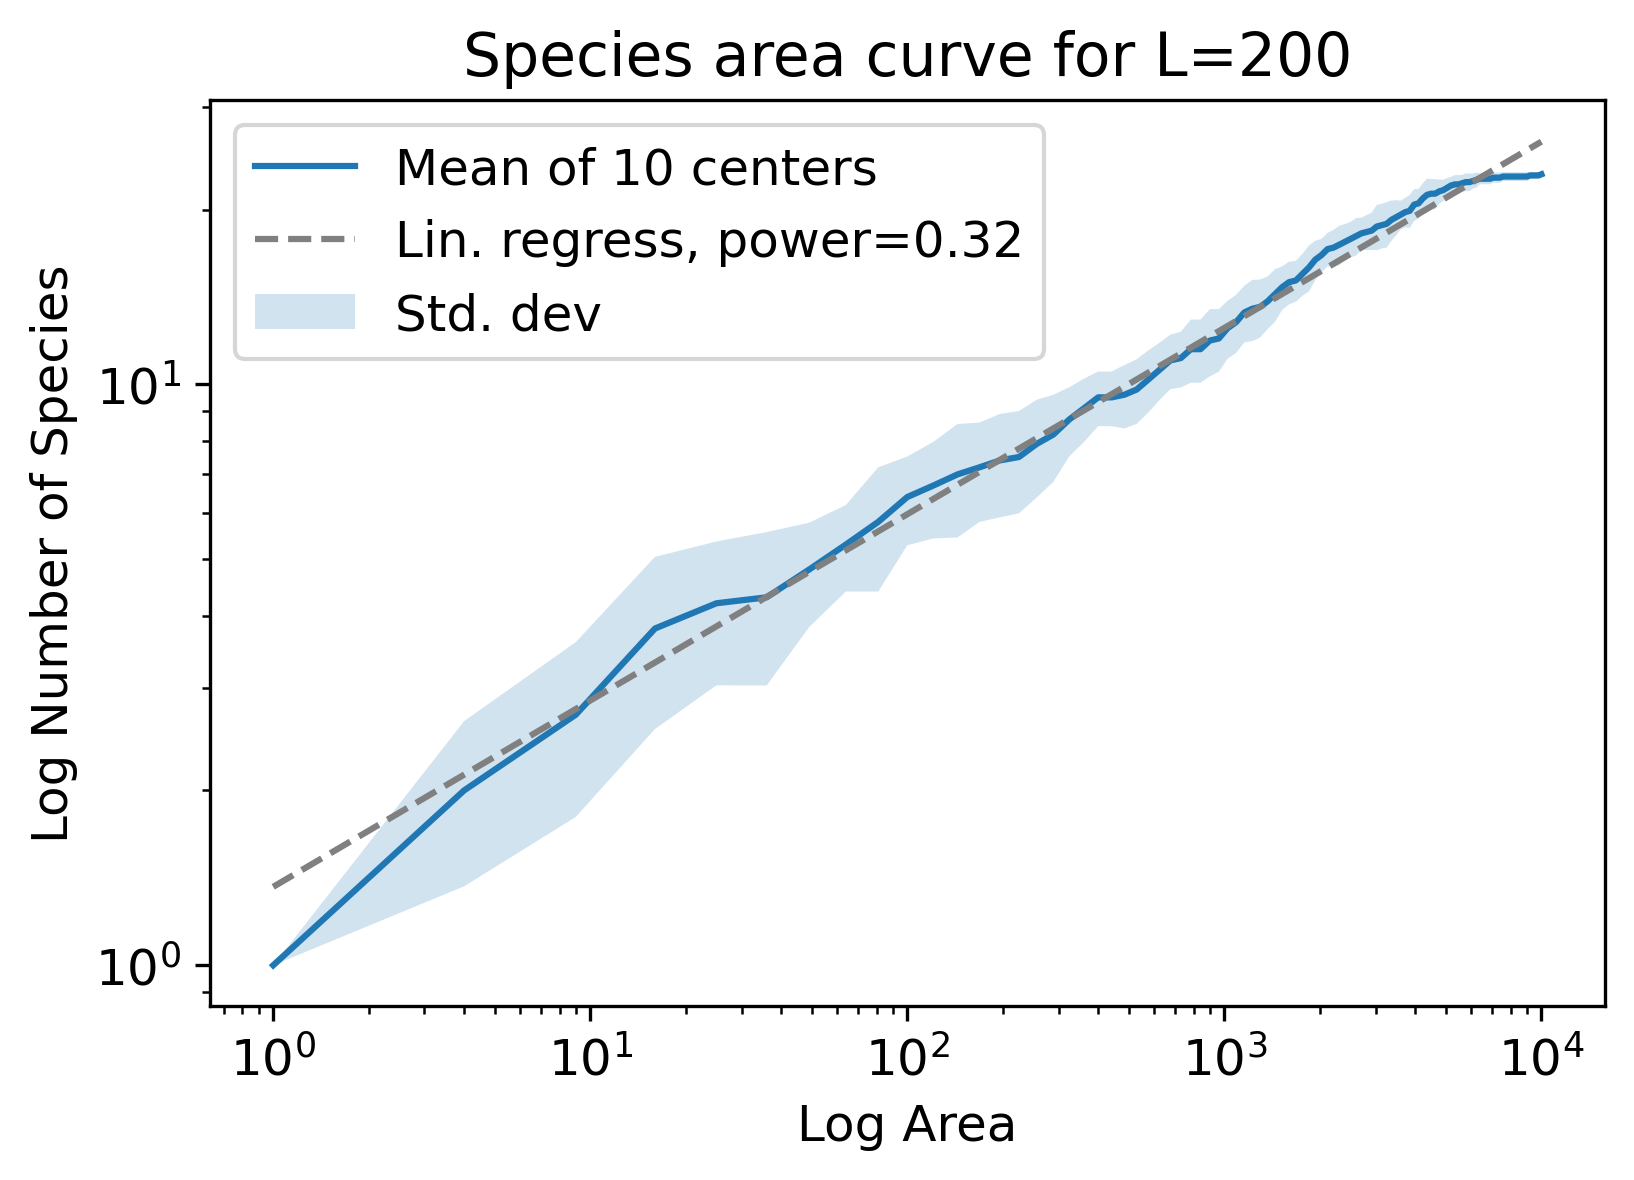

In [10]:
areas, species = sa_curve(grid)
spec_std_dev = np.std(species, axis=0)
spec_mean = np.mean(species, axis=0)

poly_coeffs = np.polyfit(np.log(areas), np.log(spec_mean), 1)
print(poly_coeffs)

plt.loglog(areas, spec_mean, label='Mean of 10 centers')
plt.loglog([areas[0], areas[-1]], 
           np.exp(poly_coeffs[1]) * np.array([areas[0], areas[-1]])**poly_coeffs[0], 
           color='grey', 
           linestyle='dashed',
           label=f'Lin. regress, power={round(poly_coeffs[0], 2)}')
plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label='Std. dev')
plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for L={L}')
plt.legend()
plt.show()